### QED-C Application-Oriented Benchmarks - Hamiltonian Simulation with HamLib - Observables

The notebook contains specific examples for the HamLib-based Hamiltonian Simulation benchmark program.
Configure and run the cell below with the desired execution settings.
Then configure and run the remaining cell(s), each one a variation of this benchmark.

This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Note: This set of benchmarks exercises new observable-oriented assessments currently under development.
This is a WORK-IN-PROGRESS.


In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
min_qubits=4
max_qubits=8
skip_qubits=1
max_circuits=1
num_shots=10000

K = 1             # number of Trotter steps
t = 0.1           # total evolution time

group_method = "simple"   # method to generate commuting groups
                            # None, "simple", "1", "2", "N"

#backend_id="qasm_simulator"
backend_id="statevector_simulator"

hub=""; group=""; project=""
provider_backend = None
exec_options = {}

api = "qiskit"

# # ==========================
# # *** If using IBM Quantum hardware, run this once to authenticate
# from qiskit_ibm_runtime import QiskitRuntimeService
# QiskitRuntimeService.save_account('YOUR_API_TOKEN_HERE')

# # *** If you use `ibm_quantum` channel, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** If you use `ibm_cloud` channel, set hub, group, and project name here
# hub=""; group=""; project="Cloud Resrouce Name (CRN) or service name"

# *** This example shows how to specify an IBMQ backend using a known "backend_id"
#     See the App-Oriented Benchmarks setup page documentation for more info ob backends and options. 
# exec_options = {
#     "use_ibm_quantum_platform": False,
#     "use_sessions": True,
# }
# backend_id="ibm_fez"



In [3]:
# Configure benchmark library modules
import sys
sys.path.insert(1, "../_common")
sys.path.insert(1, "../_common/qiskit")

import execute
execute.verbose = False
execute.verbose_time = False
#execute.noise = None

# Configure paths for hamlib benchmark modules
sys.path.insert(1, "_common")
sys.path.insert(1, "qiskit")

# ... access to HamLib datasets
import hamlib_utils
hamlib_utils.verbose = False

# ... for api-specific kernel functions (circuits)
import hamlib_simulation_kernel
hamlib_simulation_kernel.verbose = False

# ... for high-level HamLib simulation benchmark loop
import hamlib_simulation_benchmark
hamlib_simulation_benchmark.verbose = False

# ... for plotting results
import metric_plots
#metric_plots.verbose = False


### Load Metrics Data File for the Given Hamiltonian
Here we load the Hamiltonian benchmark data file and extract the metrics of interest. 

In [4]:
# Transverse Field Ising Model - 1D grid pbc h=2
hamiltonian_name = 'condensedmatter/tfim/tfim'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

backend_id="statevector_simulator"

app_name = f"HamLib-obs-{hamiltonian_name}"
app_name = app_name.replace("/", "_")

################################

# DEVNOTE: some of the code below may be move to convenience functions

metrics_array = hamlib_simulation_benchmark.load_app_metrics(app_name, backend_id)

data_none = hamlib_simulation_benchmark.query_dict_array(metrics_array, dict(group_method=None))
data_simple = hamlib_simulation_benchmark.query_dict_array(metrics_array, dict(group_method="simple"))
data_N = hamlib_simulation_benchmark.query_dict_array(metrics_array, dict(group_method="N"))

# pull groups list from the "simple" dataset
groups = [m["group"] for m in data_simple]

# pull exact values and times from the "simple" dataset; remove null values
exp_values_exact = [m["exp_value_exact"] for m in data_simple]
exp_values_exact = [x for x in exp_values_exact if x is not None]
exp_times_exact = [m["exp_time_exact"] for m in data_simple]
exp_times_exact = [x for x in exp_times_exact if x is not None]

# pull "simple" values and times
exp_values_simple = [m["exp_value_computed"] for m in data_simple]
exp_times_simple = [m["exp_time_computed"] for m in data_simple]

# pull "None" values and times
exp_values_none = [m["exp_value_computed"] for m in data_none]
exp_times_none = [m["exp_time_computed"] for m in data_none]

# pull "N" values and times
exp_values_N = [m["exp_value_computed"] for m in data_N]
exp_times_N = [m["exp_time_computed"] for m in data_N]

values = [ exp_values_exact, exp_values_simple, exp_values_none, exp_values_N]
times = [ exp_times_exact, exp_times_simple, exp_times_none, exp_times_N]


### Regenerate HamLib Benchmark Standard Plot
Here we invoke the same function that the benchmark uses to generate its plot.  We pass in the metrics of interest.

----- Expectation Value Plot -----


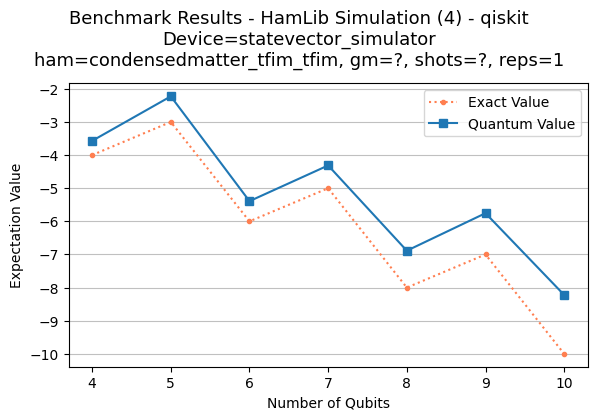

----- Expectation Time Plot -----


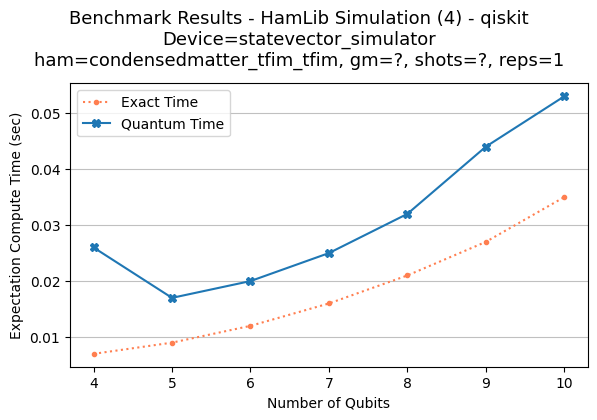

In [5]:
#### expectation value plot
benchmark_name = "HamLib Simulation"
method = 4
options = { "ham": hamiltonian_name.replace("/", "_"), "gm": "?", "shots": "?", "reps": 1  }

suptitle = f"Benchmark Results - {benchmark_name} ({method}) - {api if api else 'Qiskit'}"

hamlib_simulation_benchmark.plot_from_data(suptitle, data_N, backend_id, options)



### Regenerate the Plots using Plot Functions
This example uses functions from the metric_plots module.

----- Expectation Value Plot -----


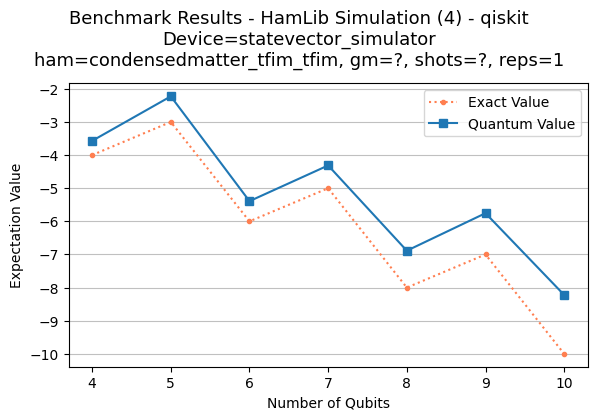

----- Expectation Time Plot -----


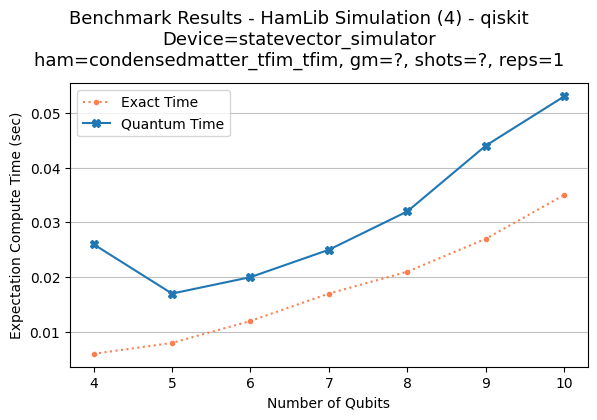

In [6]:

#### expectation value plot
benchmark_name = "HamLib Simulation"
method = 4
options = { "ham": hamiltonian_name.replace("/", "_"), "gm": "?", "shots": "?", "reps": 1  }

suptitle = f"Benchmark Results - {benchmark_name} ({method}) - {api if api else 'Qiskit'}"

exp_values = exp_values_N
exp_times = exp_times_N

# plot all line metrics, including solution quality and accuracy ratio
# vs iteration count and cumulative execution time
metric_plots.plot_expectation_value_metrics(
    suptitle,
    backend_id=backend_id,
    options=options,
    
    groups=groups,
    expectation_values_exact=exp_values_exact,
    expectation_values_computed=exp_values,   
)

# expectation time plot
# plot all line metrics, including solution quality and accuracy ratio
# vs iteration count and cumulative execution time
metric_plots.plot_expectation_time_metrics(
    suptitle,
    backend_id=backend_id,
    options=options,
    
    groups=groups,
    expectation_times_exact=exp_times_exact,
    expectation_times_computed=exp_times,
)



### Produce Multiple Plots from Multiple Datasets
Here, we combine data from several sources.  (so far, we pull all data from a single data file, but this will be enhanced)

----- Expectation Value Plot -----


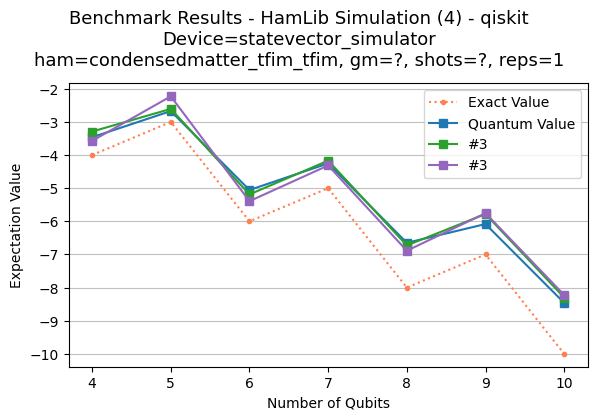

----- Expectation Time Plot -----


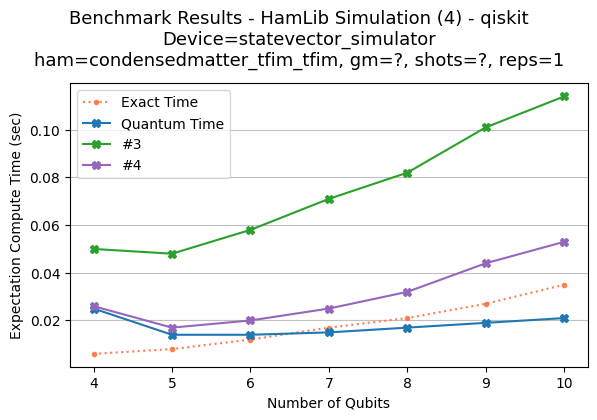

In [7]:

#### expectation value plot
benchmark_name = "HamLib Simulation"
method = 4
options = { "ham": hamiltonian_name.replace("/", "_"), "gm": "?", "shots": "?", "reps": 1  }

suptitle = f"Benchmark Results - {benchmark_name} ({method}) - {api if api else 'Qiskit'}"

#hamlib_simulation_benchmark.plot_from_data(suptitle, data_N, backend_id, options)

# plot all line metrics, including solution quality and accuracy ratio
# vs iteration count and cumulative execution time
metric_plots.plot_expectation_value_metrics_2(
    suptitle,
    backend_id=backend_id,
    options=options,
    
    groups=groups,
    expectation_values=values   
)

# expectation time plot
# plot all line metrics, including solution quality and accuracy ratio
# vs iteration count and cumulative execution time
metric_plots.plot_expectation_time_metrics_2(
    suptitle,
    backend_id=backend_id,
    options=options,
    
    groups=groups,
    expectation_times=times
)

